# Vocab Analysis
## Section 3: Analyze the Data

### 1. Import necessary libraries

In [123]:
# %load da_vocab_utility.py
# TDD backbone assertion to confirm a function call returns the desired result
def assertEquals(actual, expected, desc):
    assert(actual==expected), desc + " result: " + str(actual) + ", expected: " + str(expected)
    return "OK"
	
# check that two lists have the same contents
def lists_equal(a,b):
    return (a == b).all()
	

# shallow check (by row) for duplicates
def has_dupes(df_in):
    dupe = df_in.duplicated()
    return df_in.loc[dupe].shape[0] != 0
	
def print_line_break():
    print("-"*75)
	
def print_before_after(b, a, t=""):
    if t != "":
        print_line_break()
        print(t)
    print_line_break()
    print("Before: " + str(b))
    print_line_break()
    print("After: " + str(a))
    print_line_break()
	
def time_it(func, *args, **kwargs):
    start = time.time()
    func(*args, **kwargs)
    end = time.time()
    # https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python
    print("{:.0f}".format((end - start)*1000) + " miliseconds")
	
def has_dupe_terms(df_in):
    location = df_in['Term'].duplicated()
    return df_in.loc[location].shape[0] != 0
	
def get_rows_by_value_in_col(df_in, value, col):
    return df_in.loc[df_in[col]==value]
	
# Converts a tag string to a list to a set back to a string (this removes the duplicates)
def remove_dupes(t):
    temp = list(set(t.lower().split()))
    return ' '.join(temp) # return as string
	
# determines if an individual tag substring exists in a larger tags list string
def tag_exists(tags, tag):
    return 1 if tag in tags.split() else 0
	
def is_blank (s):
    return not (s and s.strip())
	
def get_frame_of_cards_by_term(df, t):
    return df.loc[df['Term']==t]
	

In [124]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [125]:
pd.options.display.max_columns = None

### 2. Import necessary datasets

In [126]:
# https://stackoverflow.com/questions/36977223/how-should-i-read-a-csv-file-without-the-unnamed-row-with-pandas?noredirect=1&lq=1
# import notes
notes_location = "datasets/df_notes_015_final_section_2.csv"
df_notes = pd.read_csv(notes_location, index_col=[0])

# import cards
cards_location = "datasets/df_cards_009_mid_section_2.csv"
df_cards = pd.read_csv(cards_location, index_col=[0])

# import combo
#combo_location = "datasets/df_combo_006_final_section_2.csv"
#df_combo = pd.read_csv(combo_location, index_col=[0])

# import revlog

### 3. Observe Metadata (tag) Frequency:

In [127]:
df_notes

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,len1,n1,n2,n3,n4,n5,katakana,hiragana,noun,verb,convo,hasnotags,hasVisual,hasReading,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilar,hasHomophone,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,jlpt_lvl_d,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_efficiency,total_efficiency,mean_durability
0,1331799797112,fromdict,隙間,すきま,2012-03-15 08:23:17.112,2017-11-23 23:58:09.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,3,[2],NaN,149.000000,2080.000000,8.000000,1.000000,8,1,0,0,1,0,0.125000,0.125000,18.625000
1,1331799797114,fromdict,移籍,いせき,2012-03-15 08:23:17.114,2017-11-23 23:58:09.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,3,[2],NaN,99.000000,1980.000000,7.000000,0.000000,7,0,0,0,1,0,0.000000,0.000000,14.142857
2,1331799797117,fromdict verb,吊るす,つるす,2012-03-15 08:23:17.117,2017-11-23 23:58:09.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,3,3,[3:4],NaN,143.000000,2130.000000,6.000000,1.000000,6,1,0,0,1,0,0.166667,0.166667,23.833333
3,1331799797118,checked convo fromdict,和やか,なごやか,2012-03-15 08:23:17.118,2017-11-23 23:58:09.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,4,[3:4],NaN,74.000000,1880.000000,15.000000,3.000000,15,3,0,0,1,0,0.200000,0.200000,4.933333
4,1331799797121,fromdict,営業日,えいぎょうび,2012-03-15 08:23:17.121,2017-11-23 23:58:09.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,6,[3:4],NaN,132.000000,2130.000000,6.000000,1.000000,6,1,0,0,1,0,0.166667,0.166667,22.000000
5,1331799797122,fromdict,在庫,ざいこ,2012-03-15 08:23:17.122,2017-11-23 23:58:09.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,3,[2],NaN,224.000000,2130.000000,5.000000,0.000000,5,0,0,0,1,0,0.000000,0.000000,44.800000
6,1331799797126,fromdict,有能,ゆうのう,2012-03-15 08:23:17.126,2019-03-23 22:24:15.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,4,[2],NaN,248.000000,2130.000000,9.000000,0.000000,9,0,0,0,1,0,0.000000,0.000000,27.555556
7,1331799797127,waseigo katakana fromdict,公衆トイレ,こうしゅうトイレ,2012-03-15 08:23:17.127,2019-03-26 14:13:19.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,5,8,[5:8],NaN,407.500000,2245.000000,9.000000,0.000000,18,0,0,1,1,0,0.000000,0.000000,45.277778
9,1331799797128,fromdict,送り賃,おくりちん,2012-03-15 08:23:17.128,2017-11-23 23:58:09.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,5,[3:4],NaN,178.000000,2120.000000,8.000000,0.000000,8,0,0,0,1,0,0.000000,0.000000,22.250000
10,1331799797130,fromdict,量子物理学,りょうしぶつりがく,2012-03-15 08:23:17.130,2017-11-23 23:58:09.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,9,[5:8],NaN,204.000000,2270.000000,7.000000,0.000000,7,0,0,0,1,0,0.000000,0.000000,29.142857


In [128]:
df_cards

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,ivl_q,factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,efficiency,durability
0,1331799797110,1331799797110,65,1680,10,1,2012-03-15 08:23:17.110,2015-03-08 09:00:00.000,0,1,0,0,1,0,read,0.100000,6.500000
1,1331799797112,1331799797112,149,2080,8,1,2012-03-15 08:23:17.112,2015-03-03 09:00:00.000,0,2,0,0,1,0,read,0.125000,18.625000
3,1331799797114,1331799797114,99,1980,7,0,2012-03-15 08:23:17.114,2015-02-04 09:00:00.000,0,1,0,0,1,0,read,0.000000,14.142857
5,1331799797117,1331799797117,143,2130,6,1,2012-03-15 08:23:17.117,2015-03-17 09:00:00.000,0,2,0,0,1,0,read,0.166667,23.833333
6,1331799797118,1331799797118,74,1880,15,3,2012-03-15 08:23:17.118,2015-02-06 09:00:00.000,0,1,0,0,1,0,read,0.200000,4.933333
7,1331799797121,1331799797121,132,2130,6,1,2012-03-15 08:23:17.121,2015-03-03 09:00:00.000,0,2,0,0,1,0,read,0.166667,22.000000
8,1331799797122,1331799797122,224,2130,5,0,2012-03-15 08:23:17.122,2015-07-04 09:00:00.000,2,2,0,0,1,0,read,0.000000,44.800000
9,1331799797125,1331799797125,291,1930,18,1,2012-03-15 08:23:17.125,2016-01-30 09:00:00.000,2,1,0,0,1,0,read,0.055556,16.166667
10,1331799797126,1331799797126,248,2130,9,0,2012-03-15 08:23:17.126,2015-09-04 09:00:00.000,2,2,0,0,1,0,read,0.000000,27.555556
11,1331799797127,1331799797127,229,2270,9,0,2012-03-15 08:23:17.127,2015-06-11 09:00:00.000,2,2,0,0,1,0,read,0.000000,25.444444


In [129]:
tag_freq = pd.Series(' '.join(df_notes.tags).split()).value_counts()

In [130]:
tag_freq.head(20)

textbook      2072
hasnotags     1346
fromdict      1323
verb           918
fromtest       895
hasrobo        629
len1           451
college        415
fromexam       366
numeric        341
semester1      271
addsimilar     237
checked        220
commonword     214
hiragana       209
kana           207
katakana       204
convo          182
media          180
noun           172
dtype: int64

# Initial Observations

Looks like our data is ready for some proper inspection! What are some questions that we might ask of this dataset? We could start with some simple/basic broad/overview observations about the (condensed) dataset such as:
- How many terms (unique notes) exist?
- How many study vectors (unique card types) exist (were utilized by student A)?
- When did student A first start studying?
- What is the data distribution for reps count? For laspes count?
- Of the terms that exist, how many had audio data?
- Of the terms that exist, how many had image data?

In [131]:
# unique terms in the condensed dataset
len(df_notes['Term'].unique())

6651

In [132]:
# confirm what card types exist
#df_combo['CardType'].value_counts()

In [133]:
#pd_crt # datetime of collection creation (studying commenced from this date)

In [134]:
print(df_cards.shape)

(8254, 17)


In [135]:
print(df_notes.shape)

(6651, 54)


# Define features

In [136]:
#components of binary list (cards)
type_list = ['CardType_listen','CardType_look','CardType_read','CardType_recall']

In [137]:
#components of binary list (notes, combo)
genre_list = ['clothing','animal','body','food','place']

source_list = ['fromdict','fromexam','textbook','college','convo']

jlpt_list = ['n1','n2','n3','n4','n5']

pos_list = ['noun','verb']

char_list = ['katakana','hiragana','hasReading']

has_list = ['hasVisual','hasAudio','hasMultiMeaning','hasMultiReading','hasSimilar',
    'hasHomophone','hasAltForm','hasRichExamples']

card_list = ['hasListenCard','hasPictureCard','hasReadCard',
    'hasTranslateCard']

other_list = ['commonword','len1','hasnotags']

In [138]:
#components of continuous list
len_list = ['TermLen','Syllables']

study_data_list = ['mean_ivl','mean_factor','mean_reps','mean_lapses',
                   'total_reps','total_lapses']

In [139]:
binary_list = list(genre_list + source_list + jlpt_list +
    pos_list + char_list + has_list + other_list) #card_list

continuous_list = list(len_list + study_data_list)

discrete_non_binary_list = ['NoteCreated','LastModified','TermLenGroup','jlpt_lvl_d']

# Inspect card correlations visually

In [140]:
#show correlation of stats via heatmap
df_cards_001_corr = df_cards.copy()
df_cards_001_corr = df_cards_001_corr.drop(["cid","nid",'ivl_q','factor_q','ivl','factor','reps','lapses'], axis=1)

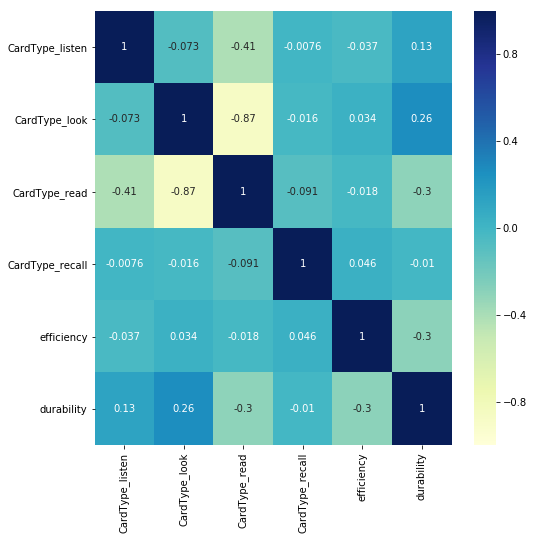

In [141]:
corr_card = df_cards_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax_card = sns.heatmap(corr_card, vmin=-1, cmap="YlGnBu", annot=True)

# Inspect note correlations visually

In [142]:
#show correlation of stats via heatmap
df_notes_001_corr = df_notes.copy()
df_notes_001_corr = df_notes_001_corr.drop(list(["nid",'len1','jlpt_lvl_d']+binary_list+card_list), axis=1)

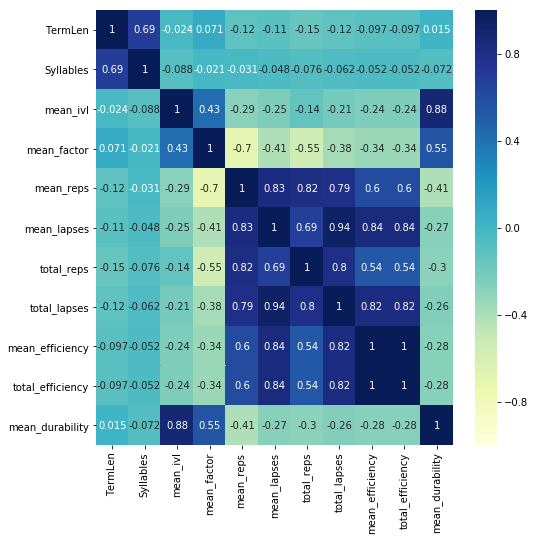

In [143]:
corr = df_notes_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, vmin=-1, cmap="YlGnBu", annot=True)

In [144]:
df_notes_002_corr = df_notes.copy()
df_notes_002_corr = df_notes_002_corr.drop(list(["nid","total_reps","total_lapses"]+source_list+pos_list+len_list+other_list+has_list+genre_list+jlpt_list+card_list+['jlpt_lvl_d','mean_factor']), axis=1)

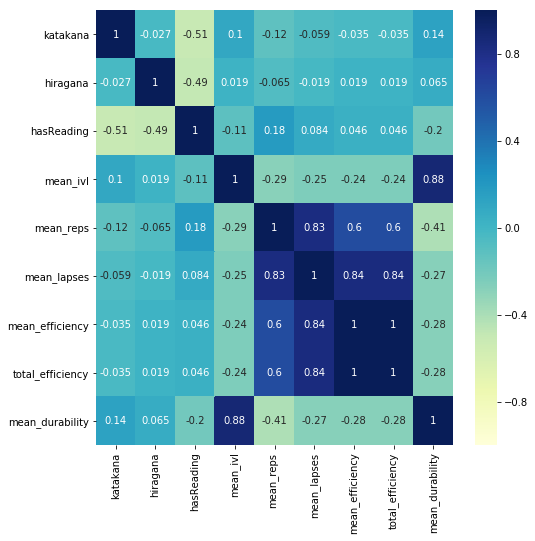

In [145]:
#show correlation of stats via heatmap
corr2 = df_notes_002_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax2 = sns.heatmap(corr2, vmin=-1, cmap="YlGnBu", annot=True)

In [146]:
df_notes_003_corr = df_notes.copy()
df_notes_003_corr = df_notes_003_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor']+char_list+
    pos_list+len_list+other_list+has_list+genre_list+jlpt_list+card_list), axis=1)

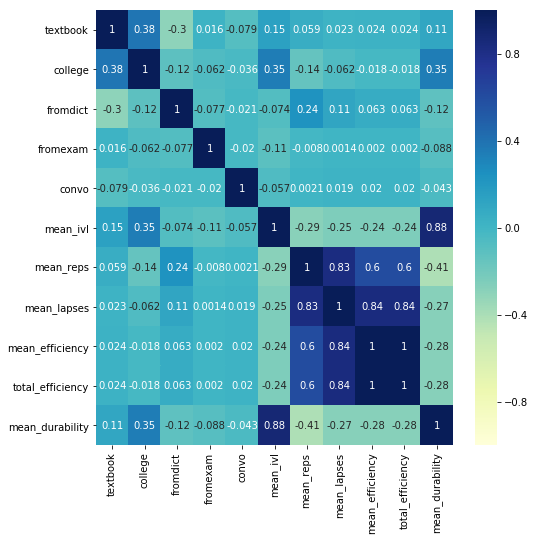

In [147]:
#show correlation of stats via heatmap
corr3 = df_notes_003_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax3 = sns.heatmap(corr3, vmin=-1, cmap="YlGnBu", annot=True)

In [148]:
df_notes_004_corr = df_notes.copy()
df_notes_004_corr = df_notes_004_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor','len1','commonword']+char_list+
    source_list+pos_list+len_list+has_list+genre_list+jlpt_list+card_list), axis=1)

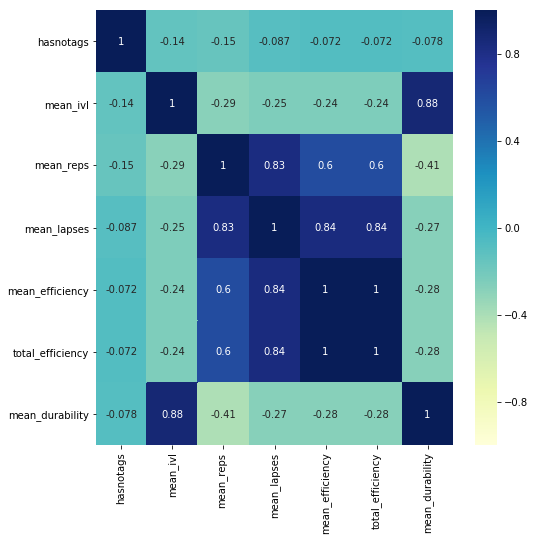

In [149]:
#show correlation of stats via heatmap
corr4 = df_notes_004_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax4 = sns.heatmap(corr4, vmin=-1, cmap="YlGnBu", annot=True)

In [150]:
df_notes_005_corr = df_notes.copy()
df_notes_005_corr = df_notes_005_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor','len1','hasnotags']+char_list+
    source_list+pos_list+len_list+has_list+genre_list+jlpt_list+card_list), axis=1)

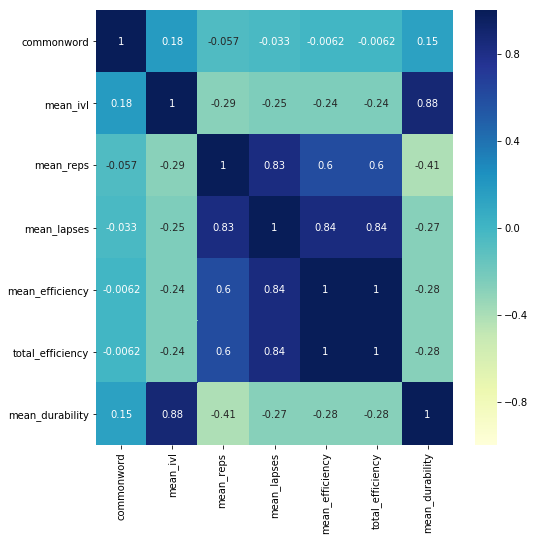

In [151]:
#show correlation of stats via heatmap
corr5 = df_notes_005_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax5 = sns.heatmap(corr5, vmin=-1, cmap="YlGnBu", annot=True)

In [152]:
df_cards_002_describe = df_cards.copy()
df_cards_002_describe = df_cards_002_describe.drop(list(["cid","nid",'ivl_q','factor_q']+type_list), axis=1)

df_cards_002_describe.describe()

,ivl,factor,reps,lapses,efficiency,durability
count,8254.000000,8254.000000,8254.000000,8254.000000,8254.000000,8254.000000
mean,407.550157,1810.059002,14.251999,0.527381,0.022227,44.046880
std,429.340820,416.792768,8.963690,1.095650,0.039326,60.652290
min,1.000000,1300.000000,1.000000,0.000000,0.000000,0.015152
25%,166.000000,1300.000000,9.000000,0.000000,0.000000,10.571429
50%,258.000000,1810.000000,12.000000,0.000000,0.000000,22.750000
75%,486.000000,2200.000000,17.000000,1.000000,0.045455,49.282468
max,3493.000000,2950.000000,83.000000,13.000000,0.333333,675.000000


In [153]:
df_cards_002_describe.corr()

,ivl,factor,reps,lapses,efficiency,durability
ivl,1.000000,0.418092,-0.272518,-0.253233,-0.269347,0.882693
factor,0.418092,1.000000,-0.705843,-0.420930,-0.353330,0.557520
reps,-0.272518,-0.705843,1.000000,0.834563,0.597533,-0.405086
lapses,-0.253233,-0.420930,0.834563,1.000000,0.833664,-0.281706
efficiency,-0.269347,-0.353330,0.597533,0.833664,1.000000,-0.296610
durability,0.882693,0.557520,-0.405086,-0.281706,-0.296610,1.000000


**reps** = work done to remember a card  
**interval** = memory length as output of memorization work done  
**ease/factor** = indicator of effort to retreive & store memory  
**lapses** = result of memory deficit, a common side-effect & indicator of inefficiency of memorization efforts  

**lapses/reps ratio** (efficiency ratio) => the closer to 0, the better ("low waste"). the higher this is, the worse : "high waste"  
**interval/reps ratio** (durability ratio) = the higher the better ("low effort" / "sticky"). the lower this is, the worse ("high effort", "slippery")  

In [154]:
df_notes_006_corr = df_notes.copy()
df_notes_006_corr = df_notes_006_corr.drop(list(binary_list + card_list + ['nid','jlpt_lvl_d']), axis=1)

In [155]:
df_notes_006_corr.describe()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_efficiency,total_efficiency,mean_durability
count,6651.000000,6651.000000,6651.000000,6651.000000,6651.000000,6651.000000,6651.000000,6651.000000,6651.000000,6651.000000,6651.000000
mean,2.660352,4.168396,379.607528,1796.726407,14.396294,0.532990,17.094723,0.634792,0.023235,0.023235,39.634767
std,1.224422,1.675359,374.670054,401.914014,8.565295,1.060342,11.484506,1.230802,0.038435,0.038435,54.509700
min,1.000000,1.000000,1.000000,1300.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.015152
25%,2.000000,3.000000,168.000000,1333.000000,9.000000,0.000000,10.000000,0.000000,0.000000,0.000000,10.714286
50%,2.000000,4.000000,260.666667,1775.000000,12.000000,0.000000,14.000000,0.000000,0.000000,0.000000,22.000000
75%,3.000000,5.000000,454.500000,2153.500000,17.000000,1.000000,21.000000,1.000000,0.046512,0.046512,45.000000
max,15.000000,30.000000,3465.000000,2950.000000,81.000000,13.000000,100.000000,13.000000,0.333333,0.333333,675.000000


In [156]:
df_notes_006_corr.corr()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_efficiency,total_efficiency,mean_durability
TermLen,1.000000,0.688153,-0.024206,0.070516,-0.123430,-0.108081,-0.152228,-0.121038,-0.097472,-0.097472,0.015311
Syllables,0.688153,1.000000,-0.088157,-0.021348,-0.030811,-0.047505,-0.075819,-0.062495,-0.052192,-0.052192,-0.071919
mean_ivl,-0.024206,-0.088157,1.000000,0.429444,-0.286466,-0.246102,-0.136622,-0.214216,-0.243802,-0.243802,0.878206
mean_factor,0.070516,-0.021348,0.429444,1.000000,-0.702039,-0.411578,-0.545228,-0.382412,-0.336424,-0.336424,0.554283
mean_reps,-0.123430,-0.030811,-0.286466,-0.702039,1.000000,0.833868,0.818924,0.790535,0.603051,0.603051,-0.409120
mean_lapses,-0.108081,-0.047505,-0.246102,-0.411578,0.833868,1.000000,0.686618,0.944874,0.840090,0.840090,-0.273666
total_reps,-0.152228,-0.075819,-0.136622,-0.545228,0.818924,0.686618,1.000000,0.802362,0.538368,0.538368,-0.295641
total_lapses,-0.121038,-0.062495,-0.214216,-0.382412,0.790535,0.944874,0.802362,1.000000,0.822097,0.822097,-0.263393
mean_efficiency,-0.097472,-0.052192,-0.243802,-0.336424,0.603051,0.840090,0.538368,0.822097,1.000000,1.000000,-0.276282
total_efficiency,-0.097472,-0.052192,-0.243802,-0.336424,0.603051,0.840090,0.538368,0.822097,1.000000,1.000000,-0.276282


In [157]:
get_rows_by_value_in_col(df_notes, 1523892839900, 'nid')

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,len1,n1,n2,n3,n4,n5,katakana,hiragana,noun,verb,convo,hasnotags,hasVisual,hasReading,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilar,hasHomophone,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,jlpt_lvl_d,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_efficiency,total_efficiency,mean_durability
7954,1523892839900,commonword noun n5,万年筆,まんねんひつ,2018-04-16 15:33:59.900,2018-05-14 17:58:39.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,3,6,[3:4],5.0,336.0,2220.0,8.25,1.0,33,4,1,1,1,1,0.121212,0.121212,40.727273


In [158]:
get_rows_by_value_in_col(df_cards, 1523892839900, 'nid')

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,ivl_q,factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,efficiency,durability
18827,1523893083493,1523892839900,420,2210,7,1,2018-04-16 15:38:03.493,2020-06-28 09:00:00.000,3,2,0,0,1,0,read,0.142857,60.000000
18828,1523893083509,1523892839900,515,2410,5,0,2018-04-16 15:38:03.509,2020-10-01 09:00:00.000,3,2,1,0,0,0,listen,0.000000,103.000000
18829,1523893129423,1523892839900,405,2210,7,1,2018-04-16 15:38:49.423,2020-06-13 09:00:00.000,3,2,0,0,0,1,recall,0.142857,57.857143
18830,1524841320859,1523892839900,4,2050,14,2,2018-04-27 15:02:00.859,2019-05-05 09:00:00.000,0,1,0,1,0,0,look,0.142857,0.285714


In [165]:
df_notes_n_corr = df_notes.copy()
df_notes_n_corr = df_notes_n_corr.drop(list(binary_list + card_list + ['nid','tags','Term','Yomi1','jlpt_lvl_d','total_reps','total_lapses','total_efficiency']), axis=1)

In [166]:
df_notes_n_corr.columns.values

array(['NoteCreated', 'LastModified', 'TermLen', 'Syllables',
       'TermLenGroup', 'mean_ivl', 'mean_factor', 'mean_reps',
       'mean_lapses', 'mean_efficiency', 'mean_durability'], dtype=object)

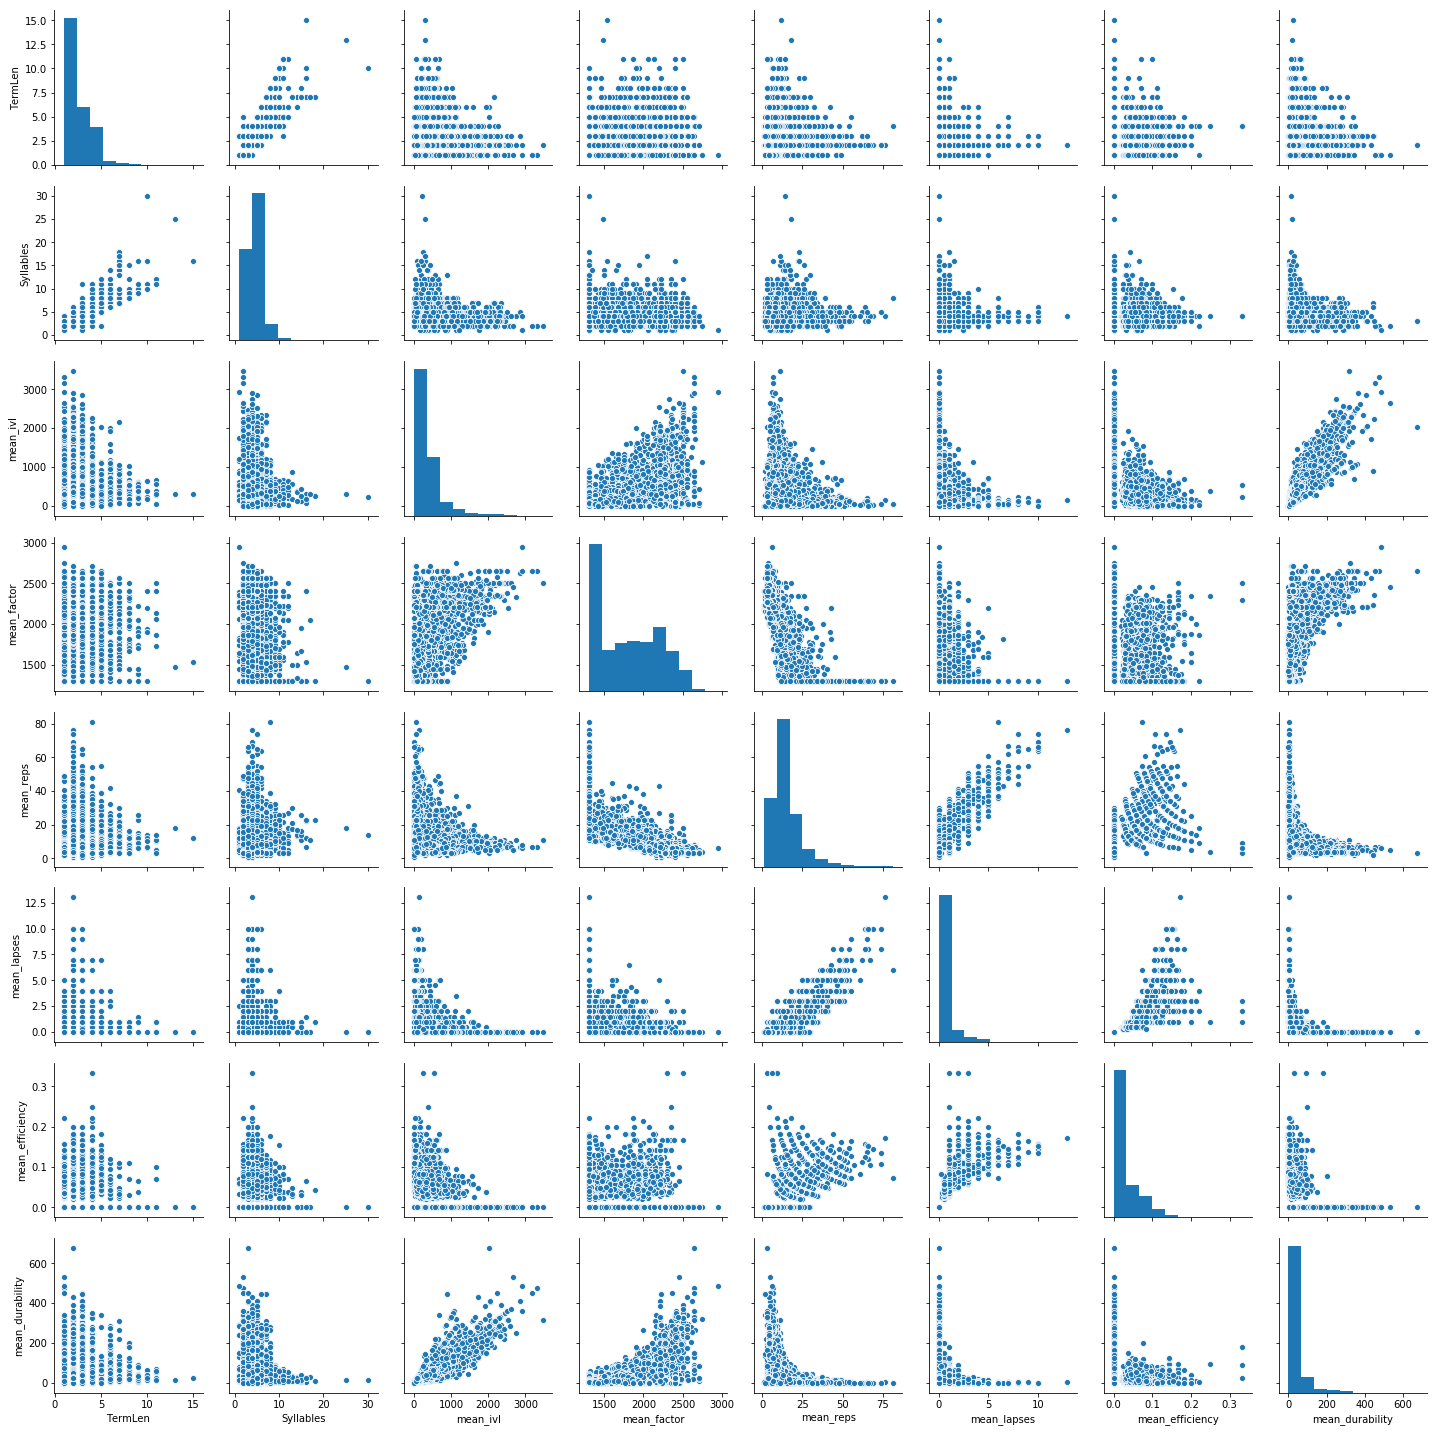

In [167]:
# Basic correlogram
sns.pairplot(df_notes_n_corr)
plt.show()

# Intitial Analysis

There appears to be a linear relationship between lapses & reps. It appears that lapses incur a cost of increasing reps. However, this info isn't directly actionable - one cannot simply just 'not forget'. The primary focus is what can be done to minimize lapses while not sacrificing efficiency (long intervals for few reps, and lapses as close as possible to 0).

# Topical Analysis

After doing some basic assessments of the data, we can dig a bit deeper:
- Is there a correlation between words having multiple readings ("yomi") and their forget rate\*?
- Is there a correlation between words having same/similar sounding words and their forget rate\*?
- What might the effect of word length be on memorability? \*\*, \*\*\*

> \* Forget rate can be understand as a multitude of things, such as the ratio between lapses & reps, as well as the raw lapse count, the average interval, and other numbers/ratios to be determined. I will attempt to clarify this in the process.  
\*\* Memorability being loosely correlated with forget rate, where memorability could be understood as a word/term's intrinsic "stickiness" in the brain, as opposed to an individual or collective's capacity to keep words/terms in their head. Sources pending.  
\*\*\* A huge caveat here being that, this dataset has a sample size of 1 (for both student and language), so all observations, interpretations, and understandings must be taken with more than a few grains of salt (and tested further with larger sample sizes, of at least 200 students, and 5 or more languages).

# Further Analysis

For a deeper understanding of what it means to aquire new terminology, the researcher believes it best to conduct analysis on term acquisition by merging multiple vectors (individual cards) of a single term into single entries, where dummy values for each vector (such as review count, lapse count, etc.) are encoded per entry. This would enable inspection and correlation analysis of:
- total reviews per term
- average ratio of reviews per term per vector (look vs hear vs recall vs read)
- where lapses are most likely to occur (per word, per vector, etc.)
- how word length, presence of kanji, katakana, hirgana, or combination thereof, may affect the above counts & ratios

# Further Information

The Spaced Repetition Software (\"SRS\") used for the study of Japanese by student \"A\" is an open souce program called Anki. The algorithm used by it to \"graduate\" (also refered to as \"maturing\") study items (called cards) so that subsequent reviews/practices will be spaced into the future is referred to as SM-2. [Please click here for more information on the SM-2 algorithm used in Anki.]("https://apps.ankiweb.net/docs/manual.html#what-algorithm")